# **Latar Belakang**

### Transjakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang beroperasi sejak tahun 2004 di Jakarta, Indonesia. TransJakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibukota yang sangat padat. Dengan jalur lintasan terpanjang di dunia (251.2 km), serta memiliki 260 halte yang tersebar dalam 13 koridor, Transjakarta yang awalnya beroperasi mulai Pkl. 05.00 – Pkl. 22.00 WIB, kini beroperasi 24 jam.

# **Pernyataan Masalah**

### Pak Anies Baswedan ingin mengetahui rute mana saja yang ramai dan tidak ramai, dikarenakan tingkat kemacetan pada DKI Jakarta sangat tinggi. Informasi ini akan membantu perusahaan untuk mengetahui jenis armada dan rute mana saja yang perlu ditambahkan jumlah armadanya atau dikurangi jumlah armadanya untuk meningkatkan pelayanan yang diberikan kedepannya

### Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

### Jenis armada apa dan rute dimana saja yang harus ditambahi jumlah armadanya atau dikurangi beradasarkan jumlah penumpangnya

# **Definisi Jenis Armada**

### Mikotrans : Armada yang dikelola oleh PT Transportasi Jakarta (Transjakarta) yang berbentuk angkutan kota (Angkot) --> Maksimal penumpang 12 orang
### BRT : Bus Rapid Transit (yang memakai jalur khusus) --> Maksimal penumpang 100 orang
### Angkutan Umum Integrasi : Bus yang memiliki pemberhentian dekat dengan stasiun MRT --> Maksimal penumpang 100 orang

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

### Dataset ini berisi informasi terkait tahun, bulan dan rute perjalanan yang diisi selama 1 tahun (2021). Ada 6 kolom di dalam dataset TransJakarta_Passengers_2021, yaitu:

- tahun : menunjukkan data direcord pada tahun berapa
- bulan : jumlah banyaknya data yang diambil dalam 1 tahun
- jenis : jenis armada yang dipakai
- kode_trayek : sebuah kode unik yang memberitahukan rute sebuah transportasi umum
- trayek : rute yang dilalui oleh transportasi umum
- jumlah_penumpang : banyaknya jumlah penumpang yang menaiki transportasi umum sesuai dengan kode_trayek

Tiap baris pada dataset mewakili rute, kode trayek, jumlah penumpang, dan jenis armadanya

Berikut 5 baris teratas dan terbawah dari dataset TransJakarta_Passengers_2021.

In [3]:
df=pd.read_csv(r'C:\Purwadhika\Modul_2\Data_analyst\Capstone_Project\TransJakarta Passengers 2021.csv')
display(df.head(),df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


# **Data Understanding and Cleaning**

### Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [5]:
df.describe(include='all')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
count,1473.0,1473.000000,1473,1473,1471,1.473000e+03
unique,NaN,NaN,3,135,136,NaN
top,NaN,NaN,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis,NaN
freq,NaN,NaN,848,12,24,NaN
mean,2021.0,6.534963,NaN,NaN,NaN,8.167586e+04
std,0.0,3.446451,NaN,NaN,NaN,1.265331e+05
min,2021.0,1.000000,NaN,NaN,NaN,0.000000e+00
25%,2021.0,4.000000,NaN,NaN,NaN,2.501600e+04
50%,2021.0,7.000000,NaN,NaN,NaN,4.962800e+04
75%,2021.0,10.000000,NaN,NaN,NaN,7.513800e+04


In [6]:
# melihat apakah ada data duplikat
df.duplicated().sum()

0

Data sudah tidak ada yang duplikat

In [7]:
# melihat data unik di tiap kolom

pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63975, 46304, 59214, 64162, 32715, 69978, 51615, 79962, 60715, 133054, 117647, 62587, 51771, 43232, 4947

In [8]:
# melihat apakah ada data NaN atau tidak
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

### Secara umum, kita bisa melihat bahwa:

- dataset TransJakarta_Passenger_2021 memiliki 6 kolom dan 1.473 baris
- kolom trayek memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan data NaN.
- kolom trayek bisa untuk dipisahkan menjadi kolom keberangkatan dan pemberhentian, untuk dapat dianalisa lebih jauh lagi

# **Split Data**

### Split data dilakukan untuk mengetahui rute keberangkatan dan pemberhentian transportasi untuk dilakukannya analisa

In [9]:
# melakukan split pada data
df_split = df['trayek'].str.split('-', expand=True)

In [10]:
# hasil data yang sudah di split
df_split

,0,1
0,Terminal Tanjung Priok,Ancol Barat
1,Bintara,Cipinang Indah
2,Terminal Kampung Melayu,Kapin Raya
3,Rawa Buaya,Rawa Kompeni
4,Tanjung Priok,Jembatan Item
...,...,...
1468,Kampung Melayu,Pulo Gebang via BKT
1469,Pulo Gebang,Pulo Gadung 2 via PIK
1470,Tanjung Priok,Senen via Taman BMW
1471,Taman Kota Intan,Museum Bahari


In [11]:
# Memasukkan data split kedalam kolom baru

df['keberangkatan'] = df_split[0]
df['pemberhentian'] = df_split[1]

In [69]:
# hasil akhir data yang sudah displit
df.head(3)

,tahun,bulan,jenis,kode_trayek,jumlah_penumpang,keberangkatan,pemberhentian
0,2021,10,Mikrotrans,JAK.88,31197,Terminal Tanjung Priok,Ancol Barat
1,2021,10,Mikrotrans,JAK.85,30711,Bintara,Cipinang Indah
2,2021,10,Mikrotrans,JAK.84,40186,Terminal Kampung Melayu,Kapin Raya


# **Membersihkan data dari typo dan whitespace**

### Ada beberapa data yang memiliki penulisan yang typo dan memiliki whitespace

In [13]:
# memperbaiki typo
df['keberangkatan'] = df['keberangkatan'].replace('Pulo Ggadung 2', 'Pulo Gadung 2')

In [14]:
# memperbaiki typo
df['kode_trayek'] = df['kode_trayek'].replace('JAK,19', 'JAK.19')


In [15]:
# memperbaiki typo
df['kode_trayek'] = df['kode_trayek'].replace('JA.77', 'JAK.77')

In [16]:
# memperbaiki typo
df['pemberhentian'] = df['pemberhentian'].replace('Ppulo Gadung', 'Pulo Gadung')

In [17]:
# memperbaiki typo
df['kode_trayek'] = df['kode_trayek'].replace('JAK. 10B', 'JAK.10B')

In [18]:
# membersihkan whitespace pada setiap kolom
df['jenis'] = df['jenis'].str.strip()
df['kode_trayek'] = df['kode_trayek'].str.strip()
df['trayek'] = df['trayek'].str.strip()
df['keberangkatan'] = df['keberangkatan'].str.strip()
df['pemberhentian'] = df['pemberhentian'].str.strip()

### Ada pergantian trayek pada kode_trayek '1A' di tahun 2021 yaitu keberangkatan dari PIK diganti menjadi keberangkatan dari Pantai Maju

- Langkah yang diambil yaitu mengganti keberangkatan dari PIK menjadi keberangkatan dari Pantai Maju pada kode_trayek '1A'

In [19]:
# Melihat apakah benar ada perbedaan rute pada kode_trayek '1A'

df[df['kode_trayek']=='1A'].sort_values('bulan')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
605,2021,1,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721,Pantai Maju,Balai Kota
1093,2021,2,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669,Pantai Maju,Balai Kota
363,2021,3,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592,Pantai Maju,Balai Kota
1339,2021,4,Angkutan Umum Integrasi,1A,PIK - Balai Kota,69934,PIK,Balai Kota
726,2021,5,Angkutan Umum Integrasi,1A,PIK - Balai Kota,62524,PIK,Balai Kota
483,2021,6,Angkutan Umum Integrasi,1A,PIK - Balai Kota,66928,PIK,Balai Kota
1217,2021,7,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960,PIK,Balai Kota
237,2021,8,Angkutan Umum Integrasi,1A,PIK - Balai Kota,35608,PIK,Balai Kota
972,2021,9,Angkutan Umum Integrasi,1A,PIK - Balai Kota,54065,PIK,Balai Kota
115,2021,10,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571,PIK,Balai Kota


In [20]:
# Membuat function untuk mengganti keberangkatan dari PIK menjadi Pantai Maju

def ganti(x):
    if x=='PIK':
        x='Pantai Maju'
        return x
    else:
        return x

In [21]:
df['keberangkatan'] = df['keberangkatan'].apply(ganti)

In [22]:
# Melihat apakah sudah terganti rute pada kdoe_trayek '1A'

df[df['kode_trayek']=='1A'].sort_values('bulan')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
605,2021,1,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721,Pantai Maju,Balai Kota
1093,2021,2,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669,Pantai Maju,Balai Kota
363,2021,3,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592,Pantai Maju,Balai Kota
1339,2021,4,Angkutan Umum Integrasi,1A,PIK - Balai Kota,69934,Pantai Maju,Balai Kota
726,2021,5,Angkutan Umum Integrasi,1A,PIK - Balai Kota,62524,Pantai Maju,Balai Kota
483,2021,6,Angkutan Umum Integrasi,1A,PIK - Balai Kota,66928,Pantai Maju,Balai Kota
1217,2021,7,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960,Pantai Maju,Balai Kota
237,2021,8,Angkutan Umum Integrasi,1A,PIK - Balai Kota,35608,Pantai Maju,Balai Kota
972,2021,9,Angkutan Umum Integrasi,1A,PIK - Balai Kota,54065,Pantai Maju,Balai Kota
115,2021,10,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571,Pantai Maju,Balai Kota


In [23]:
# Melihat apakah sudah sama kolom keberangkatan, stop, dan trayek

df.groupby('bulan').count()

,tahun,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
bulan,,,,,,,
1,120,120,120,120,120,120,119
2,119,119,119,119,119,119,119
3,124,124,124,124,124,124,124
4,120,120,120,120,120,120,120
5,125,125,125,125,125,125,123
6,122,122,122,122,122,122,121
7,126,126,126,126,126,126,125
8,122,122,122,122,122,122,121
9,122,122,122,122,122,122,121


### Dari penrhitungan diatas didapati bahwa:

- ada 9 data kosong pada kolom keberangkatan
- maka dari itu akan dilakukannya analisa lebih jauh lagi

# **Missing Values**

In [24]:
# melihat ada berapa missing values pada dataframe
df.isna().sum()

tahun               0 
bulan               0 
jenis               0 
kode_trayek         0 
trayek              2 
jumlah_penumpang    0 
keberangkatan       2 
pemberhentian       11
dtype: int64

In [25]:
# melihat data apa saja yang kosong
df[df.iloc[:,6].isna()].sort_values('bulan')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
795,2021,12,Mikrotrans,JAK.10B,NaN,4085,NaN,NaN
796,2021,12,Mikrotrans,JAK.10A,NaN,33992,NaN,NaN


In [26]:
# mengambil index data kode trayek JAK. 10B yang kosong
baris = df[df['kode_trayek']=='JAK.10B'].index
baris

Int64Index([304, 795, 1158, 1404], dtype='int64')

In [27]:
# mengisi missing values sesuai dengan rute
df.loc[baris, 'keberangkatan'] = df[df['kode_trayek']=='JAK.10B']['keberangkatan'].fillna(value='Gondangdia')

In [28]:
# melihat data apa yang masih kosong
df[df.iloc[:,6].isna()].sort_values('bulan')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
796,2021,12,Mikrotrans,JAK.10A,NaN,33992,NaN,NaN


In [29]:
# mengambil index data kode trayek JAK.10A yang masih kosong
baris = df[df['kode_trayek']=='JAK.10A'].index
baris

Int64Index([305, 796, 1159, 1405], dtype='int64')

In [30]:
# mengisi missing values sesuai dengan rute yang sudah ditentukan
df.loc[baris, 'keberangkatan'] = df[df['kode_trayek']=='JAK.10A']['keberangkatan'].fillna(value='Gondangdia')

In [31]:
# melihat data apa saja yang masih kosong
df[df.iloc[:,7].isna()].sort_values('bulan')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
573,2021,1,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,261,Kota Tua Explorer,None
731,2021,5,Angkutan Umum Integrasi,GR2,Tanah Abang Explorer,3945,Tanah Abang Explorer,None
734,2021,5,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,24,Kota Tua Explorer,None
489,2021,6,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,33,Kota Tua Explorer,None
1223,2021,7,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,11,Kota Tua Explorer,None
243,2021,8,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,8,Kota Tua Explorer,None
978,2021,9,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,15,Kota Tua Explorer,None
121,2021,10,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,21,Kota Tua Explorer,None
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3,Kota Tua Explorer,None
795,2021,12,Mikrotrans,JAK.10B,NaN,4085,Gondangdia,NaN


In [32]:
# mengambil index data kode trayek JAK.10A yang kosong
baris = df[df['kode_trayek']=='JAK.10A'].index
baris

Int64Index([305, 796, 1159, 1405], dtype='int64')

In [33]:
# mengisi missing values sesuai dengan rute yang sesuai
df.loc[baris, 'pemberhentian'] = df[df['kode_trayek']=='JAK.10A']['pemberhentian'].fillna(value='Gondangdia')


In [34]:
# mengambil index data kode trayek JAK.10B yang kosong
baris = df[df['kode_trayek']=='JAK.10B'].index
baris

Int64Index([304, 795, 1158, 1404], dtype='int64')

In [35]:
# mengisi missing values sesuai dengan rute yang sesuai
df.loc[baris, 'pemberhentian'] = df[df['kode_trayek']=='JAK.10B']['pemberhentian'].fillna(value='Gondangdia')


In [36]:
# melihat data apa saja yang masih kosong
df[df.iloc[:,7].isna()].sort_values('bulan')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,keberangkatan,pemberhentian
573,2021,1,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,261,Kota Tua Explorer,None
731,2021,5,Angkutan Umum Integrasi,GR2,Tanah Abang Explorer,3945,Tanah Abang Explorer,None
734,2021,5,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,24,Kota Tua Explorer,None
489,2021,6,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,33,Kota Tua Explorer,None
1223,2021,7,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,11,Kota Tua Explorer,None
243,2021,8,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,8,Kota Tua Explorer,None
978,2021,9,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,15,Kota Tua Explorer,None
121,2021,10,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,21,Kota Tua Explorer,None
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3,Kota Tua Explorer,None


In [37]:
# mengambil index data keberangkatan Kota Tua Explorer yang kosong
baris = df[df['keberangkatan']=='Kota Tua Explorer'].index
baris

Int64Index([121, 243, 489, 573, 734, 978, 1223, 1472], dtype='int64')

In [38]:
# mengisi missing values sesuai dengan rute yang sesuai
df.loc[baris, 'pemberhentian'] = df[df['keberangkatan']=='Kota Tua Explorer']['pemberhentian'].fillna(value='Kota Tua Explorer')

In [39]:
# mengambil index data keberangkatan Tanah Abang Explorer
baris = df[df['keberangkatan']=='Tanah Abang Explorer'].index
baris

Int64Index([731], dtype='int64')

In [40]:
# mengisi missing values sesuai dengan rute yang sesuai
df.loc[baris, 'pemberhentian'] = df[df['keberangkatan']=='Tanah Abang Explorer']['pemberhentian'].fillna(value='Tanah Abang Explorer')

In [41]:
# melihat apakah masih ada missing values
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
keberangkatan       0
pemberhentian       0
dtype: int64

**Missing values pada trayek dibiarkan kosong karena kolom trayek akan didrop**

Sudah tidak ada lagi missing values, dan sudah terisi dengan trayek yang merujuk pada https://transjakarta.co.id/peta-rute/

# **Data yang sudah bersih**

In [42]:
# mendrop kolom trayek yang sudah tidak dibutuhkan
df = df.drop(columns='trayek', axis=1)

In [43]:
# kolom trayek sudah tidak ada
df

,tahun,bulan,jenis,kode_trayek,jumlah_penumpang,keberangkatan,pemberhentian
0,2021,10,Mikrotrans,JAK.88,31197,Terminal Tanjung Priok,Ancol Barat
1,2021,10,Mikrotrans,JAK.85,30711,Bintara,Cipinang Indah
2,2021,10,Mikrotrans,JAK.84,40186,Terminal Kampung Melayu,Kapin Raya
3,2021,10,Mikrotrans,JAK.80,61883,Rawa Buaya,Rawa Kompeni
4,2021,10,Mikrotrans,JAK.77,66616,Tanjung Priok,Jembatan Item
...,...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,11353,Kampung Melayu,Pulo Gebang via BKT
1469,2021,11,Angkutan Umum Integrasi,11D,59155,Pulo Gebang,Pulo Gadung 2 via PIK
1470,2021,11,Angkutan Umum Integrasi,10K,34498,Tanjung Priok,Senen via Taman BMW
1471,2021,11,Angkutan Umum Integrasi,GR4,4,Taman Kota Intan,Museum Bahari


Data sudah diisi dengan nilai yang diperlukan untuk melakukan analisa

---
# **Data Analysis**

Kita sudah melakukan tahap data cleaning. Sekarang kita sudah bisa untuk memulai melakukan analisis untuk mencari tahu **Jenis armada apa dan rute dimana yang harus ditambahi jumlah armadanya atau dikurangi beradasarkan jumlah penumpangnya**

### Uji Statistik

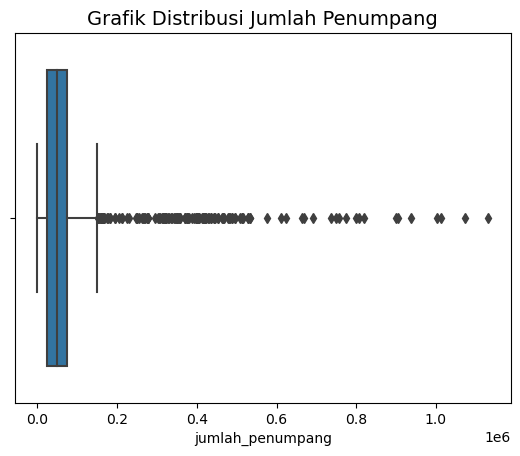

In [44]:
# melihat distribusi data jumlah_penumpang
sns.boxplot(
    data=df,
    x='jumlah_penumpang'
)
plt.title('Grafik Distribusi Jumlah Penumpang', size=14);

Bisa dilihat pada grafik diatas, bahwa data jumlah penumpang tidak terdistribusi dengan normal. Maka dari itu Hypotheses Testing for Proportion menggunakan Kruskal Wallis test, dan untuk data outlayers akan tetap dibiarkan karena dengan asumsi bahwa jumlah penumpang tidak bisa diprediksi setiap bulannya.

In [45]:
from scipy.stats import kruskal

Hypothesis
- Ho: Mean rank jumlah penumpang dari ketiga jenis armada adalah sama
- Ha: Minimal ada 1 yang berbeda dari mean rank jumlah penumpang dari ketiga jenis armada

In [46]:
# pengujian melihat pvalue
stat, pvalue = kruskal(
    df[df['jenis']=='BRT']['jumlah_penumpang'],
    df[df['jenis']=='Angkutan Umum Integrasi']['jumlah_penumpang'],
    df[df['jenis']=='Mikrotrans']['jumlah_penumpang']
)

pvalue

2.2581139960736734e-168

In [47]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa minimal salah satu jenis armada memiliki jumlah penumpang yang mean rank-nya berbeda.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa minimal salah satu jenis armada memiliki jumlah penumpang yang mean rank-nya berbeda.
    ''')


    pvalue = 2.2581139960736734e-168. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa minimal salah satu jenis armada memiliki jumlah penumpang yang mean rank-nya berbeda.
    


### Berdasarkan jenis armada dan jumlah penumpang

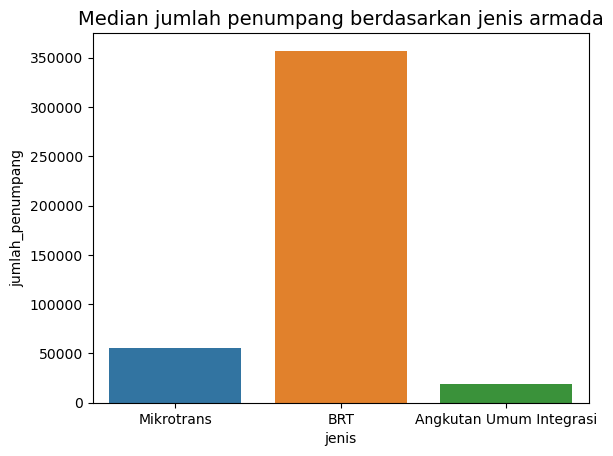

In [61]:
# melihat proporsi data menggunakan barplot
sns.barplot(
    data=df,
    x='jenis',
    y='jumlah_penumpang',
    ci=0,
    estimator=np.median
)
plt.title('Median jumlah penumpang berdasarkan jenis armada', size=14);

Dari grafik diatas total rata-rata jumlah penumpang yang menaiki kendaraan umum jenis armada BRT memiliki nilai paling tinggi, hal itu membuat jumlah penumpang dipengrauhi oleh jenis armadanya

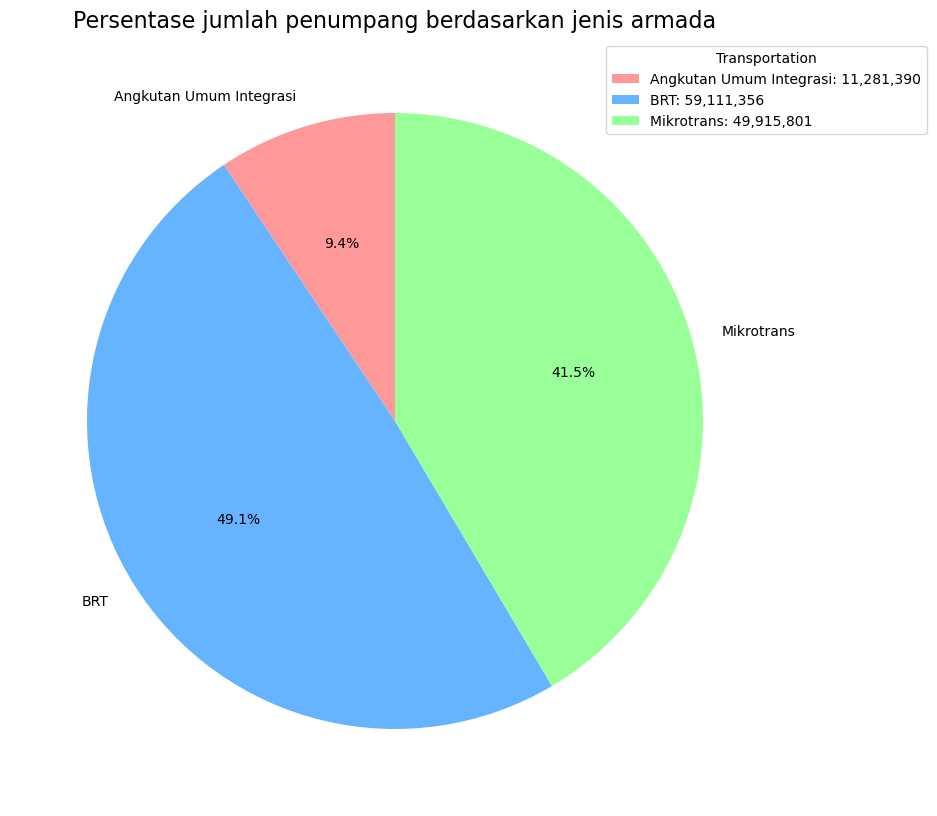

In [49]:
# membuat groupby jumlah penumpang berdasarkan jenis armdanya
grouped_jenis = df.groupby('jenis')['jumlah_penumpang'].sum()

# mencari yang tertinggi berdasarkan jenis
highest_jenis = grouped_jenis.idxmax()

# membuat pie chart
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['#ff9999','#66b3ff','#99ff99']
ax.pie(grouped_jenis, labels=grouped_jenis.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax.set_title('Persentase jumlah penumpang berdasarkan jenis armada', fontsize=16)

# membuat legend menggunakan hasil value
legends = [f"{row[0]}: {row[1]:,.0f}" for row in grouped_jenis.iteritems()]

plt.legend(legends, 
        loc='center right', 
        bbox_to_anchor=(1.2, 0.93), 
        fontsize=10,
        title = 'Transportation')

plt.show()

Dari grafik diatas kita bisa mendapatkan jawaban, bahwa:

- Jenis angkutan umum BRT memiliki total jumlah penumpang paling banyak selama 12 bulan
- Jenis armada Angkutan Umum Integrasi memiliki total penumpang paling sedikit selama 12 bulan

Namun perlu diketahui bahwa ukuran tipe armada BRT dan Angkutan Umum Integrasi adalah sama. Dari sini kita dapat melihat bahwa kemungkinan rute yang dilalui berpengaruh juga pada jumlah penumpang

In [50]:
# Membuat dataframe sesuai jenis

# df Mikrotrans
df_mikro = df[df['jenis']=='Mikrotrans']

# df BRT
df_brt = df[df['jenis']=='BRT']

# df Angkutan Umum Integrasi
df_aui = df[df['jenis']=='Angkutan Umum Integrasi']

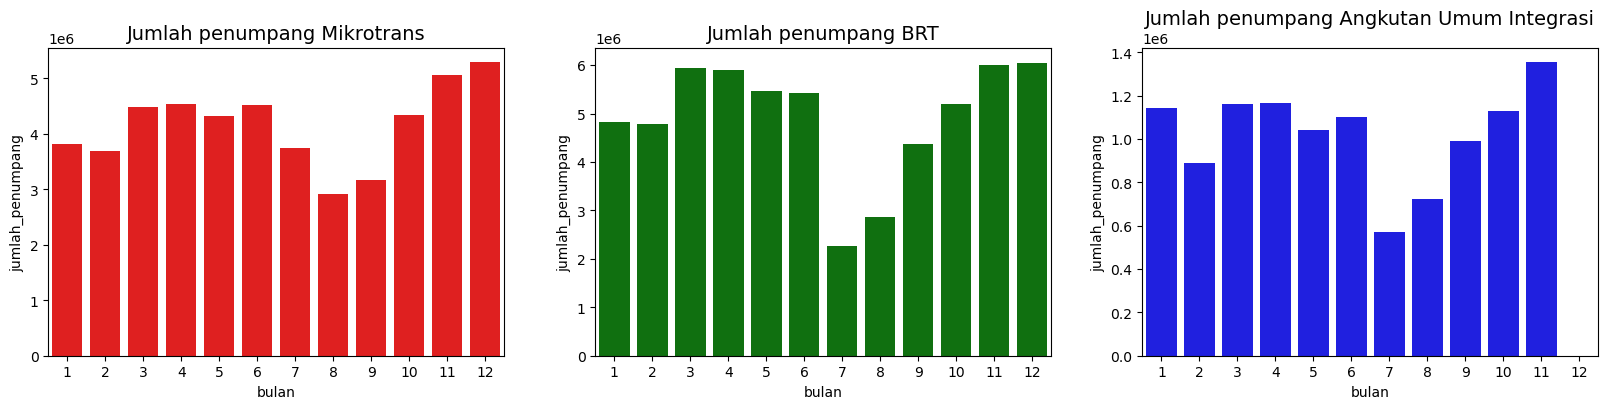

In [51]:
# melihat jumlah penumpang berdasarkan bulan pada jenis armada mikrotrans
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.barplot(
    data=df_mikro,
    x='bulan',
    y='jumlah_penumpang',
    ci=0,
    estimator=np.sum,
    color='red'
    )
plt.title('Jumlah penumpang Mikrotrans', size=14)

plt.subplot(1,3,2)
sns.barplot(
    data=df_brt,
    x='bulan',
    y='jumlah_penumpang',
    ci=0,
    estimator=np.sum,
    color='green'
    )
plt.title('Jumlah penumpang BRT', size=14)

plt.subplot(1,3,3)
sns.barplot(
    data=df_aui,
    x='bulan',
    y='jumlah_penumpang',
    ci=0,
    estimator=np.sum,
    color='blue'
    )
plt.title('Jumlah penumpang Angkutan Umum Integrasi', size=14)

plt.show()

Bisa dilihat pada grafik diatas, berikut adalah total jumlah penumpang dalam 12 bulan. Namun dapat dilihat pada grafik Angkutan Umum Integrasi jumlah penumpang pada bulan 12 adalah 0, dapat diasumsikan bahwa tidak dilakukan record data pada bulan tersebut

### Mencari median tertinggi berdasarkan bulan dan jumlah penumpang

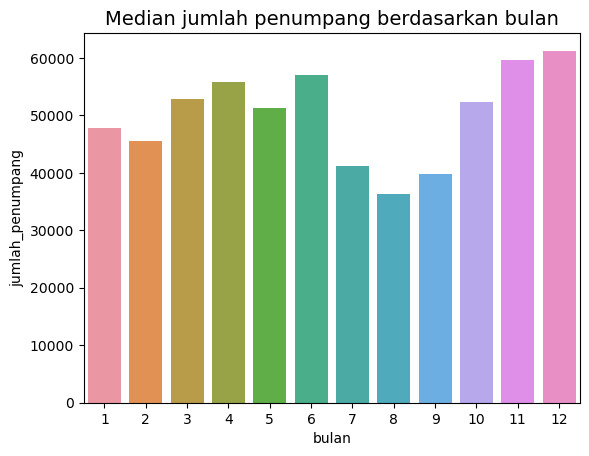

In [52]:
# melihat median jumlah penumpang berdasarkan bulan
sns.barplot(
    data=df,
    x='bulan',
    y='jumlah_penumpang',
    estimator=np.median,
    ci=0
)
plt.title('Median jumlah penumpang berdasarkan bulan', size=14);

Dari grafik diatas bisa kita lihat bahwa median tertinggi adalah pada bulan 12, maka dari itu untuk mencari top 5 dan bottom 5 jumlah penumpang berdasarkan rute akan mengambil sample dari bulan 12

### Berdasarkan rute dan jumlah penumpang

**Sekarang kita akan mencari rute mana yang memiliki jumlah penumpang paling banyak dan paling sedikit selama 12 bulan (top 5 & bottom 5) & mengambil data berdasarkan bulan 12 (median tertinggi)**

In [53]:
# mencari top 5 jumlah penumpang
top_5 = df.groupby(['kode_trayek', 'keberangkatan', 'pemberhentian', 'jenis','bulan']).sum()[['jumlah_penumpang']].reset_index()
top_5 = top_5[top_5['bulan']==12].sort_values('jumlah_penumpang', ascending=False).head()

top_5

,kode_trayek,keberangkatan,pemberhentian,jenis,bulan,jumlah_penumpang
11,1,Blok M,Kota,BRT,12,1131439
570,9,Pinang Ranti,Pluit,BRT,12,819178
510,8,Lebak Bulus,Harmoni,BRT,12,533221
330,5,Kampung Melayu,Ancol,BRT,12,513138
270,3,Kalideres,Pasar Baru,BRT,12,465124


In [54]:
# melihat data bulan 12 dan dengan jumlah penumpang yang 0
df[(df['bulan']==12) & (df['jumlah_penumpang']==0)]

,tahun,bulan,jenis,kode_trayek,jumlah_penumpang,keberangkatan,pemberhentian
820,2021,12,Angkutan Umum Integrasi,9H,0,Cipedak,Blok M
821,2021,12,Angkutan Umum Integrasi,9E,0,Kebayoran Lama,Jelambar
822,2021,12,Angkutan Umum Integrasi,9D,0,Pasar Minggu,Tanah Abang
823,2021,12,Angkutan Umum Integrasi,8K,0,Batu Sari,Tanah Abang
824,2021,12,Angkutan Umum Integrasi,8E,0,Bintaro,Blok M
825,2021,12,Angkutan Umum Integrasi,8D,0,Joglo,Blok M
826,2021,12,Angkutan Umum Integrasi,8C,0,Kebayoran Lama,Tanah Abang
827,2021,12,Angkutan Umum Integrasi,7P,0,Pondok Kelapa,BKN
828,2021,12,Angkutan Umum Integrasi,7D,0,Pancoran,TMII
829,2021,12,Angkutan Umum Integrasi,7B,0,Kampung Rambutan,Blok M


Jika dilihat pada data diatas dapat kita simpulkan bahwa pada tanggal 12 tidak adanya dilakukan record pada pengambilan data. Maka dari itu untuk mencari bottom 5 penumpang kita harus mengeliminasi jumlah penumpang yang tidak direcord (jumlah penumpang = 0)

In [55]:
# men-drop data bulan 12 dengan jumlah penumpang 0
df = df.drop(df[(df['bulan']==12) & (df['jumlah_penumpang']==0)].index)

In [56]:
# mencari bottom 5 jumlah penumpang
bottom_5 = df.groupby(['kode_trayek', 'keberangkatan', 'pemberhentian', 'jenis','bulan']).sum()[['jumlah_penumpang']].reset_index()
bottom_5 = bottom_5[bottom_5['bulan']==12].sort_values('jumlah_penumpang', ascending=True).head()

bottom_5

,kode_trayek,keberangkatan,pemberhentian,jenis,bulan,jumlah_penumpang
382,6H,Senen,Lebak Bulus,Angkutan Umum Integrasi,12,8
226,1R,Senen,Tanah Abang,Angkutan Umum Integrasi,12,176
716,JAK.10B,Gondangdia,Gondangdia,Mikrotrans,12,4085
884,JAK.22,Dwikora,Penas Kalimalang,Mikrotrans,12,22786
776,JAK.13,Tanah Abang,Kota Intan via Jembatan Lima,Mikrotrans,12,24193


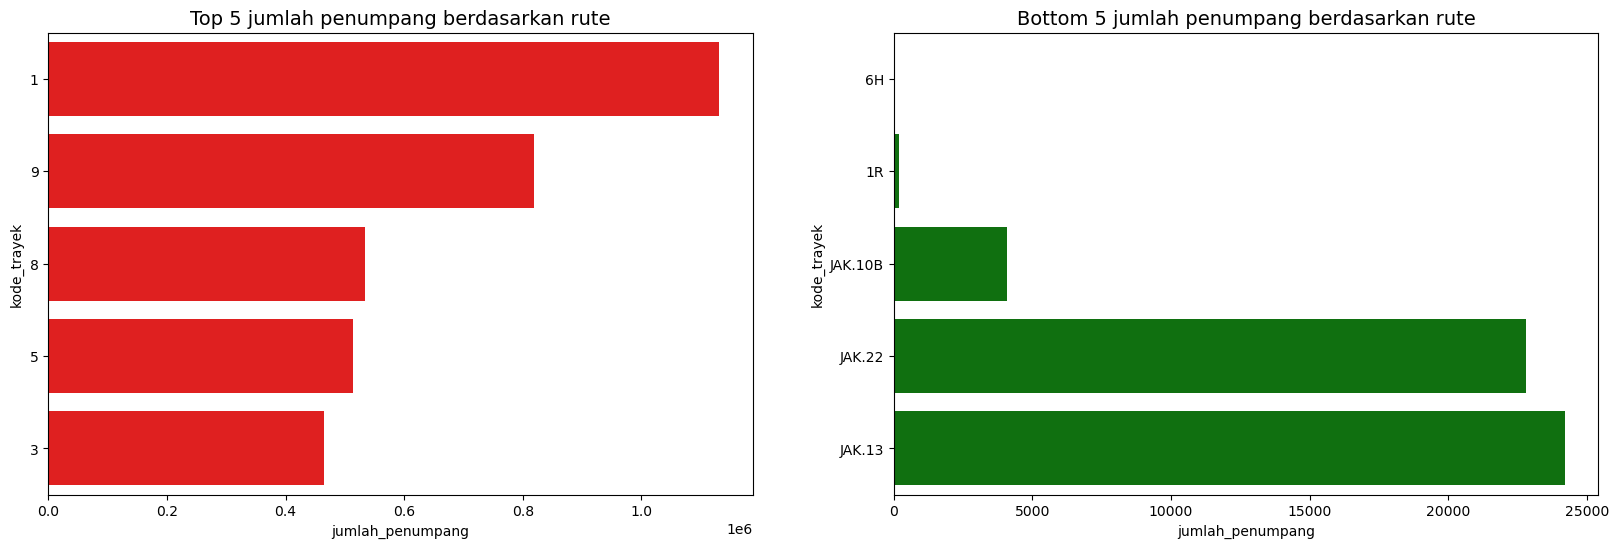

In [57]:
# membuat grafik total jumlah penumpang berdasarkan rute
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.barplot(
    data=top_5,
    x='jumlah_penumpang',
    y='kode_trayek',
    ci=0,
    estimator=np.mean,
    color='red'
    )
plt.title('Top 5 jumlah penumpang berdasarkan rute', size=14)

plt.subplot(1,2,2)
sns.barplot(
    data=bottom_5,
    x='jumlah_penumpang',
    y='kode_trayek',
    ci=0,
    estimator=np.mean,
    color='green'
    )
plt.title('Bottom 5 jumlah penumpang berdasarkan rute', size=14);

Dapat dilihat pada grafik diatas, bahwa top 5 jumlah penumpang selama 12 bulan adalah rute yang berada pada dalam kota dan perkantoran merujuk pada website transjakarta, sedangkan rute yang berada pada bottom 5 adalah rute yang memiliki jalur antar kota dan tidak melewati jalur perkantoran merujuk pada website transjakarta

In [67]:
# Mencari top 5 nilai persentase dari jumlah_penumpang

# Menghitung total nilai
total = df['jumlah_penumpang'].sum()

# Mengubah nilai menjadi persentase
top_5['jumlah_penumpang_persen'] = ((top_5['jumlah_penumpang'] / total) * 100).round(2)

top_5

,kode_trayek,keberangkatan,pemberhentian,jenis,bulan,jumlah_penumpang,jumlah_penumpang_persen
11,1,Blok M,Kota,BRT,12,1131439,0.94
570,9,Pinang Ranti,Pluit,BRT,12,819178,0.68
510,8,Lebak Bulus,Harmoni,BRT,12,533221,0.44
330,5,Kampung Melayu,Ancol,BRT,12,513138,0.43
270,3,Kalideres,Pasar Baru,BRT,12,465124,0.39


In [66]:
# Mencari bottom 5 nilai persentase dari jumlah_penumpang

# Menghitung total nilai
total = df['jumlah_penumpang'].sum()

# Mengubah nilai menjadi persentase
bottom_5['jumlah_penumpang_persen'] = ((bottom_5['jumlah_penumpang'] / total) * 100).round(4)

bottom_5

,kode_trayek,keberangkatan,pemberhentian,jenis,bulan,jumlah_penumpang,jumlah_penumpang_persen
382,6H,Senen,Lebak Bulus,Angkutan Umum Integrasi,12,8,0.0000
226,1R,Senen,Tanah Abang,Angkutan Umum Integrasi,12,176,0.0001
716,JAK.10B,Gondangdia,Gondangdia,Mikrotrans,12,4085,0.0034
884,JAK.22,Dwikora,Penas Kalimalang,Mikrotrans,12,22786,0.0189
776,JAK.13,Tanah Abang,Kota Intan via Jembatan Lima,Mikrotrans,12,24193,0.0201


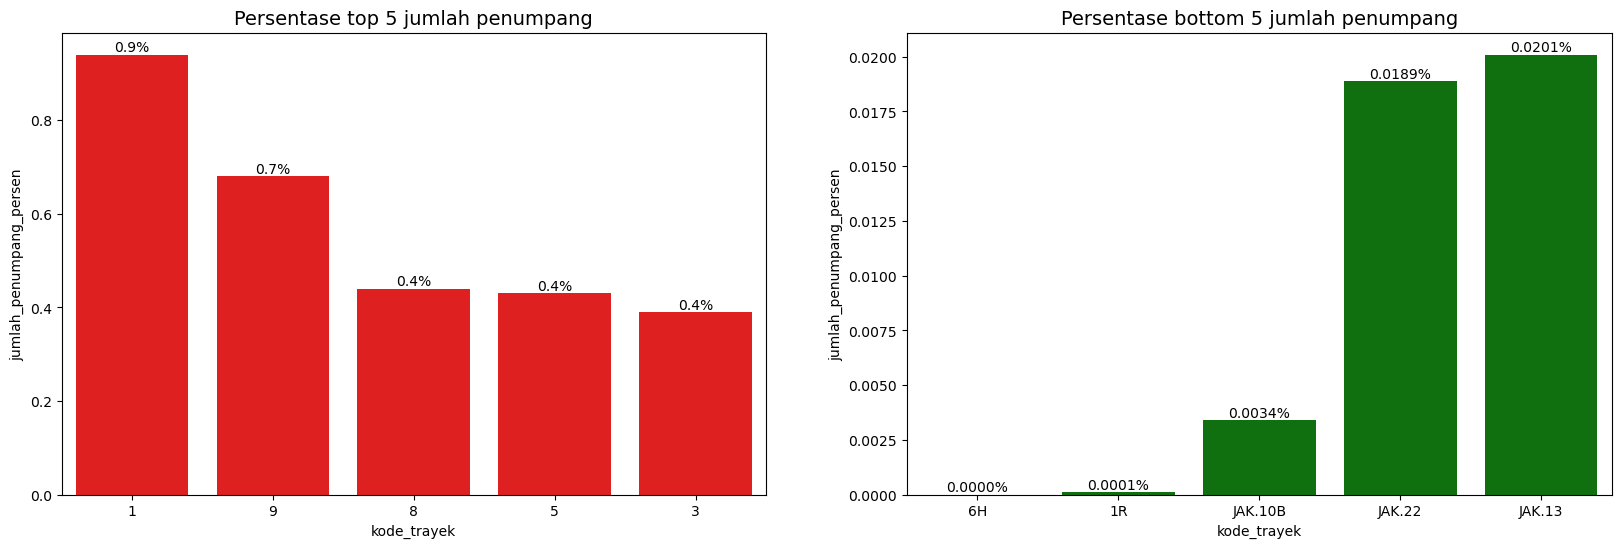

In [68]:
# membuat grafik persentase jumlah penumpang
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

ax = sns.barplot(
    data=top_5,
    x='kode_trayek',
    y='jumlah_penumpang_persen',
    ci=0,
    color='red'
)
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.title('Persentase top 5 jumlah penumpang', size=14)

plt.subplot(1,2,2)

ax1 = sns.barplot(
    data=bottom_5,
    x='kode_trayek',
    y='jumlah_penumpang_persen',
    ci=0,
    color='green'
)
for p in ax1.containers:
    ax1.bar_label(p, fmt='%.4f%%', label_type='edge')
plt.title('Persentase bottom 5 jumlah penumpang', size=14)

plt.show()

Jika dilihat pada grafik diatas, persentase bottom 5 sangat minim sekali dibandingkan dengan persentase top 5

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan seperti berikut:
* Armada jenis BRT adalah jenis armada yang memiliki jumlah penumpang terbanyak
* Armada Mikrotrans adalah armada yang memiliki jumlah armada terbanyak, dengan asumsi bahwa tipe armada Mikrotrans lebih kecil dari ukuran armada BRT dan Angkutan Umum Integrasi
* Jika dilihat berdasarkan kode trayek, kode trayek yang memiliki rute dalam kota atau daerah perkantoran adalah rute dengan jumlah penumpang paling banyak
* Armada Mikrotrans adalah armada yang paling sibuk dengan asumsi bahwa maksimal penumpang yang bisa dibawa adalah 12 orang, namun meiliki total jumlah penumpang yang tidak berbeda jauh dengan Armada BRT yang bisa membawa penumpang maksimal 100 orang

**Rekomendasi**
1. Armada BRT dan armada Angkutan Umum Integrasi adalah tipe armada yang sama yaitu sebuah bus. Namun dengan tipe yang sama, armada Angkutan Umum Integrasi memiliki jumlah penumpang yang sedikit, maka dari itu beberapa rute armada Angkutan Umum Integrasi lebih baik ditiadakan, dan armada Angkutan Umum Integrasi yang tidak terpakai untuk bisa dialokasikan untuk dipakai oleh rute armada BRT
2. Pada rute armada BRT bisa ditambahkan jumlah armadanya, dikarenakan total jumlah penumpang yang sangat banyak. Hal ini mampu untuk mengurangi kemacetan pada DKI Jakarta, dengan asumsi dikarenakan dengan bertambahnya jumlah armada, maka akan lebih banyak lagi masyarakat yang akan naik Transjakarta untuk menghindari kemacetan
3. Melihat banyaknya jumlah penumpang pada armada Mikrotrans, dapat dipertimbangkan untuk mengganti tipe armada Mikrotrans menjadi tipe yang lebih besar untuk menambah daya angkut jumlah penumpang
4. Untuk lebih mengoptimalkan lagi biaya operasional pada rute-rute yang memiliki total jumlah penumpang yang sedikit. Dengan asumsi bahwa biaya operasional 1 armada tipe bus sangat besar dibandingkan dengan biaya operasional 1 armada tipe angkutan kota
5. Untuk mampu merevisi rute pada jenis armada Angkutan Umum Integrasi. Diasumsikan bahwa halte armada Angkutan Umum Integrasi tidak ada yang dekat dengan stasiun KRL, yang menyebabkan penumpang KRL lebih memilih memakai ojek online dibandingkan dengan menggunakan armada Angkutan Umum Integrasi

Dengan menjawab semua pertanyaan yang ada, diharapkan analisis ini bisa membantu perusahaan untuk lebih mengoptimalkan lagi pemilihan rute yang lebih baik dan lebih bisa lagi memanfaatkan untuk menggunakan armada yang sudah ada.

In [62]:
df.to_csv('Data_clean.csv')